# Student Performance vs Funding

#### Data sources: https://www.kaggle.com/noriuk/us-educational-finances?select=states.csv

### Import Dependencies and Setup for the analyze

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import warnings

# Study data files paths
average_scores_path = "Input_Data/naep.csv"
fed_revenue_path = "Input_Data/states.csv"

# Read the score data and the revenue results
scores_data = pd.read_csv(average_scores_path)
revenue_data = pd.read_csv(fed_revenue_path)

In [2]:
# Combine the data into a single dataset
merged_data_df = pd.merge(scores_data, revenue_data, how = "inner", 
                          left_on=['STATE','YEAR'], right_on=['STATE', 'YEAR'])

# Convert to numeric
merged_data_df['AVG_SCORE'] = merged_data_df['AVG_SCORE'].apply(pd.to_numeric, errors = 'coerce')
merged_data_df['TOTAL_REVENUE'] = merged_data_df['TOTAL_REVENUE'].apply(pd.to_numeric, errors = 'coerce')
merged_data_df['INSTRUCTION_EXPENDITURE'] = merged_data_df['INSTRUCTION_EXPENDITURE'].apply(pd.to_numeric, errors = 'coerce' )

merged_data_df = merged_data_df.drop(columns=['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 
                                              'TOTAL_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 
                                              'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE'])

merged_data_df = merged_data_df.dropna()

# Display the data table for preview
merged_data_df

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610
...,...,...,...,...,...,...,...,...
2035,1994,Virginia,213.457286,Reading,4,1044721.0,6125739,3271356
2036,1994,Washington,212.695386,Reading,4,915952.0,5739012,2918426
2037,1994,West Virginia,213.146935,Reading,4,313750.0,1854403,1051169
2038,1994,Wisconsin,224.174545,Reading,4,843747.0,5682439,3257526


In [3]:
# Calculate the Total revenue per Student
# Note: The total revenue is the same regardless the grade or subject

revenue_per_student = round((merged_data_df["TOTAL_REVENUE"]*1000)/merged_data_df["ENROLL"],2)
# revenue_per_student.head()

merged_data_df["TOTAL_REV_PER_STUDENT"] = revenue_per_student
merged_data_df

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,TOTAL_REV_PER_STUDENT
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479,10014.26
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479,10014.26
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479,10014.26
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479,10014.26
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610,22339.38
...,...,...,...,...,...,...,...,...,...
2035,1994,Virginia,213.457286,Reading,4,1044721.0,6125739,3271356,5863.52
2036,1994,Washington,212.695386,Reading,4,915952.0,5739012,2918426,6265.63
2037,1994,West Virginia,213.146935,Reading,4,313750.0,1854403,1051169,5910.45
2038,1994,Wisconsin,224.174545,Reading,4,843747.0,5682439,3257526,6734.77


In [4]:
# Calculate the Instruction spending per Student for 2015
# Note: The instruction expenditure is the same regardless the grade or subject

spending_per_student = round((merged_data_df["INSTRUCTION_EXPENDITURE"]*1000)/merged_data_df["ENROLL"],2)
# spending_per_student.head()

merged_data_df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = spending_per_student
merged_data_df

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,TOTAL_REV_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479,10014.26,5194.03
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479,10014.26,5194.03
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479,10014.26,5194.03
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479,10014.26,5194.03
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610,22339.38,11354.14
...,...,...,...,...,...,...,...,...,...,...
2035,1994,Virginia,213.457286,Reading,4,1044721.0,6125739,3271356,5863.52,3131.32
2036,1994,Washington,212.695386,Reading,4,915952.0,5739012,2918426,6265.63,3186.22
2037,1994,West Virginia,213.146935,Reading,4,313750.0,1854403,1051169,5910.45,3350.34
2038,1994,Wisconsin,224.174545,Reading,4,843747.0,5682439,3257526,6734.77,3860.79


In [5]:
# Group merged data by the test subject
test_subject = merged_data_df.groupby(['TEST_SUBJECT'])
# test_subject.head()

### 2015 Reveune and Spending analysis 
2015 is the most recent year

In [6]:
# 2015 dataframe
year_2015 = merged_data_df[(merged_data_df['YEAR'] == 2015)]

year_2015.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,TOTAL_REV_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479,10014.26,5194.03
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479,10014.26,5194.03
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479,10014.26,5194.03
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479,10014.26,5194.03
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610,22339.38,11354.14


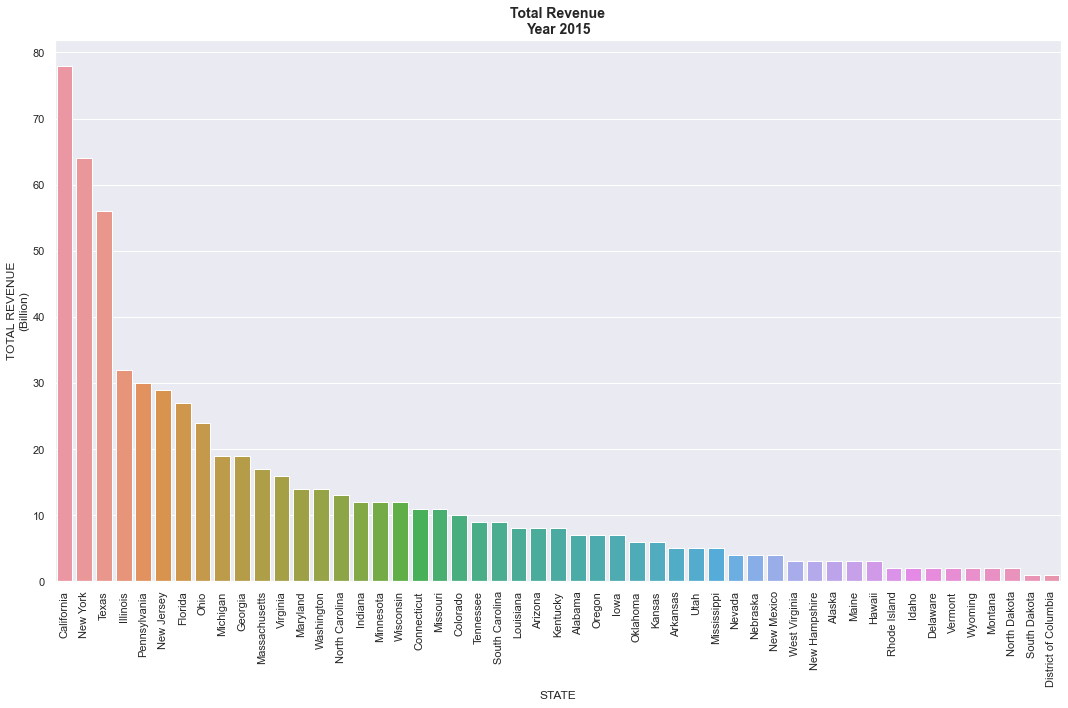

In [7]:
# Total revenue by State in 2015, presenting in barplot

rev_sort_2015 = year_2015.sort_values("TOTAL_REVENUE", ascending = False)
rev_by_million = round(rev_sort_2015["TOTAL_REVENUE"]/1000000,0)
rev_sort_2015["TOTAL_REVENUE"] = rev_by_million
                       
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (15, 10))
 
sns.barplot(y = "TOTAL_REVENUE", x = "STATE", data = rev_sort_2015, ax = ax)
ax.set(ylabel = "TOTAL REVENUE\n(Billion)") 
plt.title("Total Revenue\nYear 2015", fontsize = 14, fontweight = "bold")

ax.tick_params(axis = 'x', rotation = 90)
plt.tight_layout(h_pad = 1)

plt.savefig("readme_images/H_State_Total_Rev")

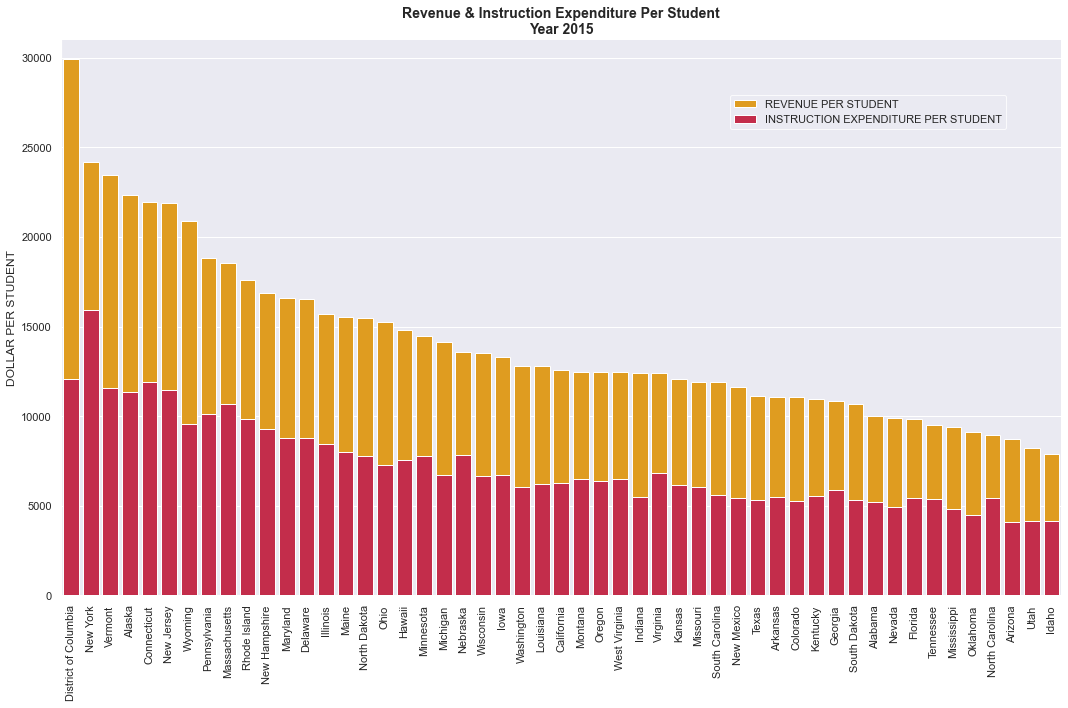

In [8]:
# Total revenue vs Instruction expenditure per student
rev_per_stu_sort_2015 = year_2015.sort_values("TOTAL_REV_PER_STUDENT", ascending = False)

f, ax = plt.subplots(figsize = (15, 10))

sns.set_color_codes("pastel")
ax = sns.barplot(x = "STATE", y = "TOTAL_REV_PER_STUDENT", 
                 label = "REVENUE PER STUDENT", data = rev_per_stu_sort_2015, color = "orange", ax = ax)

sns.set_color_codes("muted")
ax = sns.barplot(x = "STATE", y = "INSTRUCTION_EXPENDITURE_PER_STUDENT", 
                 label = "INSTRUCTION EXPENDITURE PER STUDENT", data = rev_per_stu_sort_2015, color = "crimson", ax = ax)

handles, labels = ax.get_legend_handles_labels()

ax.legend(ncol = 1, loc = "upper right", frameon = True, edgecolor = "w", borderaxespad = 5)

ax.set(ylim = (0, 31000), xlabel = "",
       ylabel = "DOLLAR PER STUDENT")
plt.title("Revenue & Instruction Expenditure Per Student\nYear 2015", fontsize = 14, fontweight = "bold")

ax.tick_params(axis = 'x', rotation = 90)
sns.despine(bottom = True)
plt.tight_layout(h_pad = 1)

plt.savefig("readme_images/H_State_Rev_Exp_Per_Student")

### 2015 Funding vs Average Reading Scores

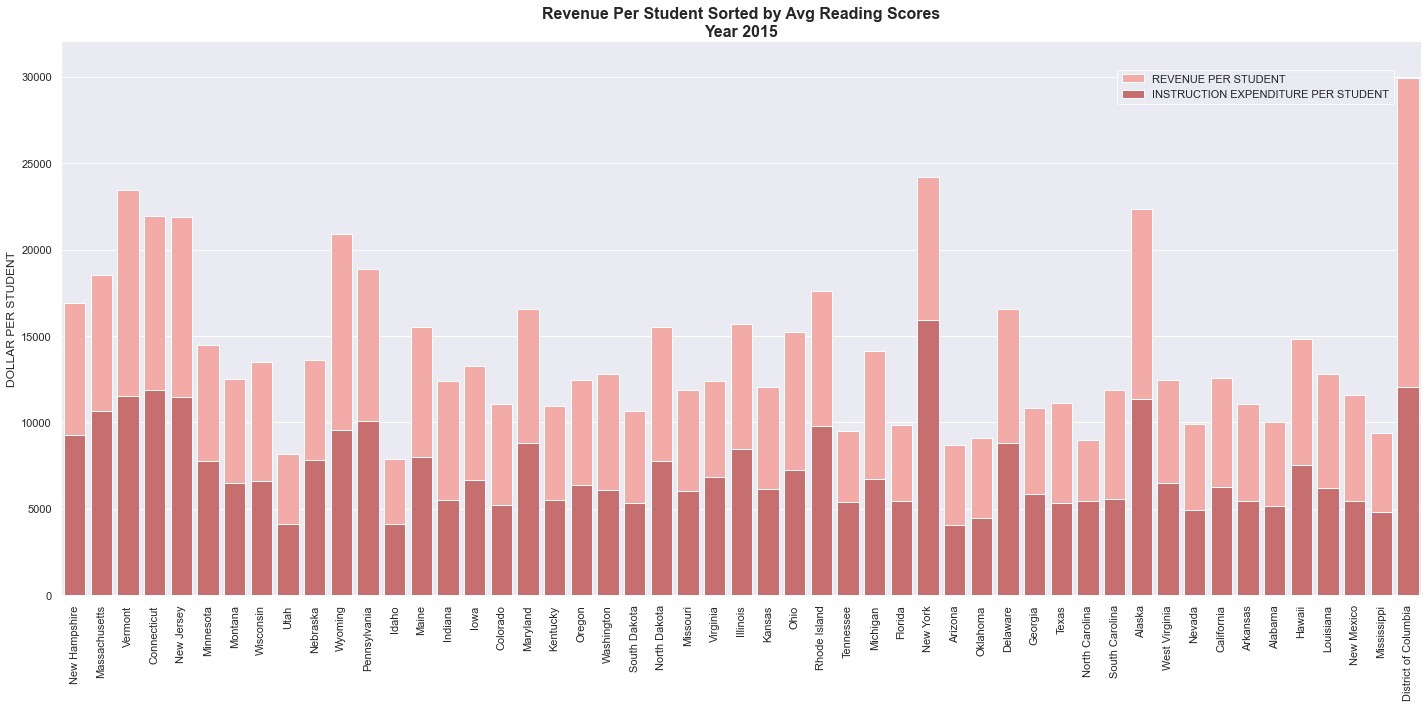

In [9]:
# Total revenue vs Instruction expenditure per student
# Sorted by 8th grade Reading avg score

year_2015_8th_read = year_2015[(year_2015['TEST_YEAR'] == 8) & (year_2015['TEST_SUBJECT'] == "Reading")]
sort_8th_read = year_2015_8th_read.sort_values("AVG_SCORE", ascending = False)

f, ax = plt.subplots(figsize = (20, 10))  
   
sns.set_color_codes("pastel")
ax = sns.barplot(x = "STATE", y = "TOTAL_REV_PER_STUDENT", 
                 label = "REVENUE PER STUDENT", data = sort_8th_read, color = "r", ax = ax)

sns.set_color_codes("muted")
ax = sns.barplot(x = "STATE", y = "INSTRUCTION_EXPENDITURE_PER_STUDENT",
                 label = "INSTRUCTION EXPENDITURE PER STUDENT", data = sort_8th_read, color = "r", ax = ax)

ax.tick_params(axis = 'x', rotation = 90)

handles, labels = ax.get_legend_handles_labels()

ax.legend(ncol = 1, loc = "upper right", frameon = True, edgecolor = "w", borderaxespad = 2.5)

ax.set(ylim = (0, 32000), xlabel = "",
       ylabel = "DOLLAR PER STUDENT")
plt.title("Revenue Per Student Sorted by Avg Reading Scores\nYear 2015", 
          fontsize = 16, fontweight = "bold")

sns.despine(bottom = True)
plt.tight_layout(h_pad = 1)

plt.savefig("readme_images/H_Rev_Exp_Read_AvgScore")

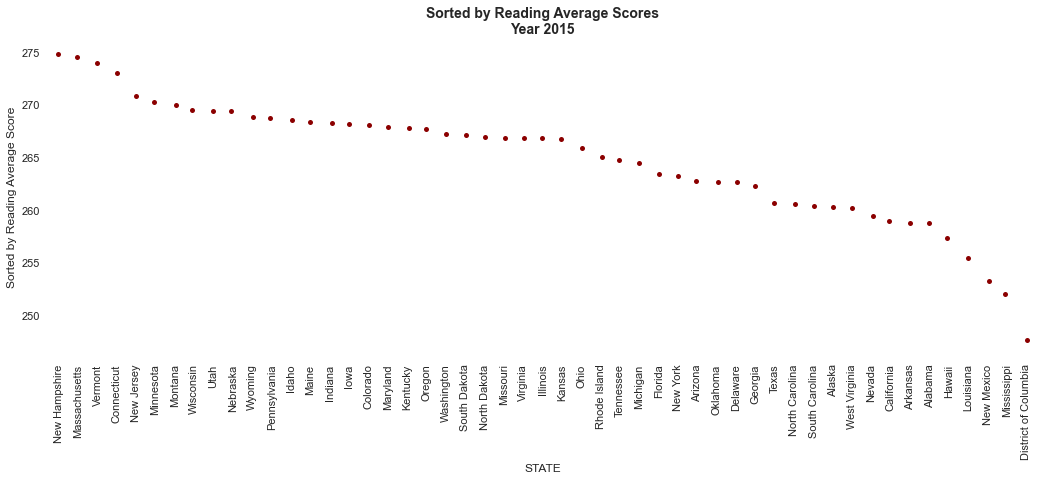

In [10]:
# Sorted by 8th grade Reading avg score
sns.set_theme(style = "white")

ax_read = sns.catplot(x = "STATE", y = "AVG_SCORE", data = sort_8th_read, color = "darkred",
                      label = "AVERAGE READING SCORE", height = 5, aspect = 3)
# plt.grid(which = "both", ls = "-")

ax_read.set_ylabels("Sorted by Reading Average Score", fontsize = 12)

ax.legend(ncol = 1, loc = "center right", frameon = True, borderaxespad = 1)

plt.xticks(rotation = 90)
plt.title("Sorted by Reading Average Scores\nYear 2015", 
          fontsize = 14, fontweight = "bold")

sns.despine(left = True, bottom = True)

plt.savefig("readme_images/H_AvgScore_Read_Sort", transparent = True)

### 2015 Funding vs Average Math Scores

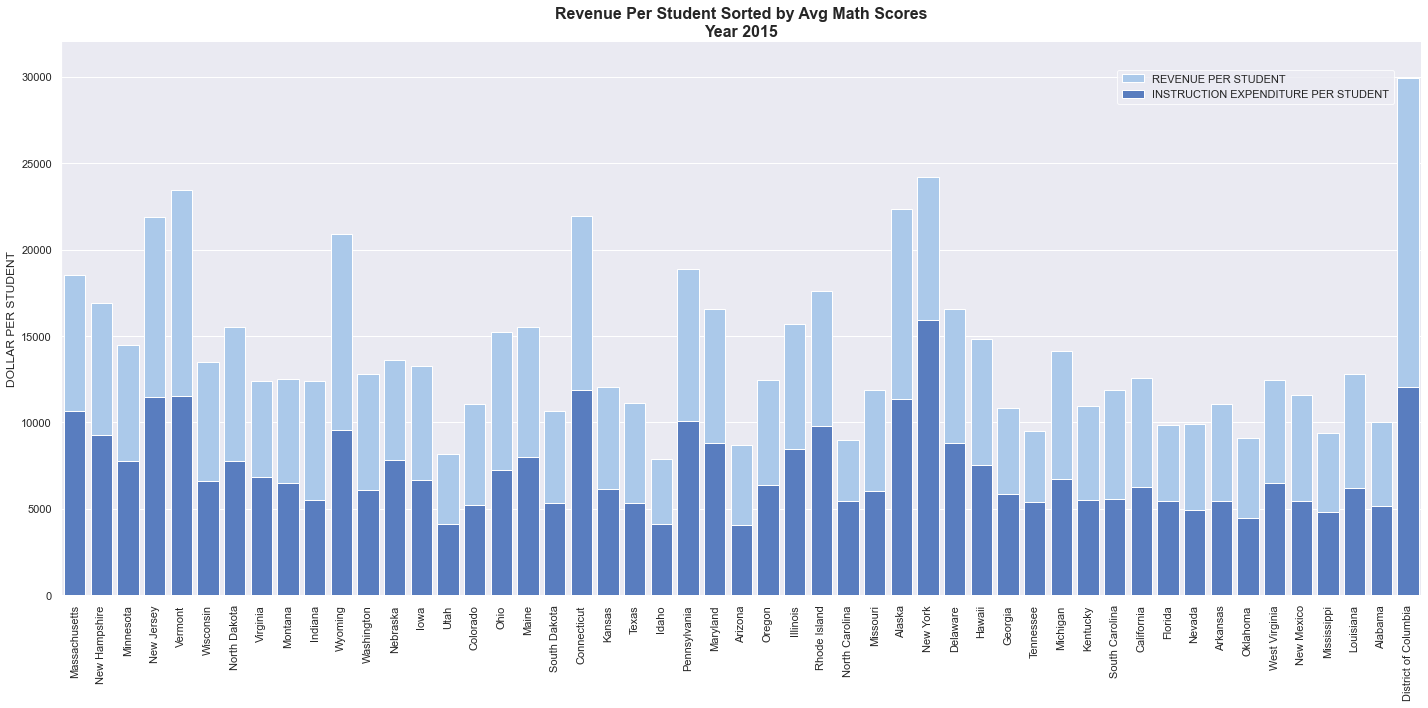

In [11]:
# Total revenue vs Instruction expenditure per student
# Sorted by 8th grade Math avg score
sns.set_theme(color_codes = True)

year_2015_8th_math = year_2015[(year_2015['TEST_YEAR'] == 8) & (year_2015['TEST_SUBJECT'] == "Mathematics")]
sort_8th_math = year_2015_8th_math.sort_values("AVG_SCORE", ascending = False)

f, ax = plt.subplots(figsize = (20, 10))  
   
sns.set_color_codes("pastel")
ax = sns.barplot(x = "STATE", y = "TOTAL_REV_PER_STUDENT", 
                 label = "REVENUE PER STUDENT", data = sort_8th_math, color = "b", ax = ax)

sns.set_color_codes("muted")
ax = sns.barplot(x = "STATE", y = "INSTRUCTION_EXPENDITURE_PER_STUDENT",
                 label = "INSTRUCTION EXPENDITURE PER STUDENT", data = sort_8th_math, color = "b", ax = ax)

ax.tick_params(axis = 'x', rotation = 90)

handles, labels = ax.get_legend_handles_labels()

ax.legend(ncol = 1, loc = "upper right", frameon = True, edgecolor = "w", borderaxespad = 2.5)

ax.set(ylim = (0, 32000), xlabel = "",
       ylabel = "DOLLAR PER STUDENT")
plt.title("Revenue Per Student Sorted by Avg Math Scores\nYear 2015", 
          fontsize = 16, fontweight = "bold")

sns.despine(bottom = True)
plt.tight_layout(h_pad = 1)

plt.savefig("readme_images/H_Rev_Exp_Math_AvgScore")

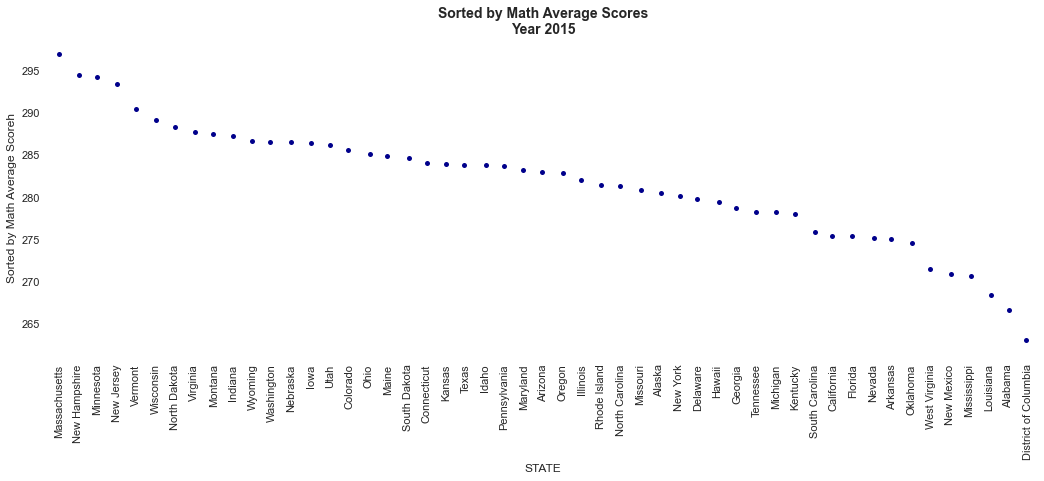

In [12]:
# Sorted by 8th grade Math avg score
sns.set_theme(style = "white")

ax_math = sns.catplot(x = "STATE", y = "AVG_SCORE", data = sort_8th_math, color = "darkblue",
                      height = 5, aspect = 3)
# plt.grid(which = "both", ls = "-")

ax_math.set_ylabels("Sorted by Math Average Scoreh", fontsize = 12)
plt.xticks(rotation = 90)
plt.title("Sorted by Math Average Scores\nYear 2015", 
          fontsize = 14, fontweight = "bold")

sns.despine(left = True, bottom = True)

plt.savefig("readme_images/H_AvgScore_Math_Sort", transparent = True)

### 2015 Total Reveue per Student vs Average Scores

### 2015 Intruction Expenditure Per Student vs Average Scores
#### Linear regression analysis

### Instruction Expenditure Per Student vs Average Scores - All Years

### Data Output

In [21]:
# # output file (csv)
# merged_data_df.to_csv("Output_Data/merged_data_df.csv", index = False, header = True)
# all_year_math.to_csv("Output_Data/all_year_math.csv", index = False, header = True)
# all_year_reading.to_csv("Output_Data/all_year_reading.csv", index = False, header = True)
